In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
IMG_SIZE = (88, 126)
IMG_ARRAY_SHAPE = IMG_SIZE[::-1]
def load_image_vector(path):
    image =  Image.open(path).convert('L').resize(IMG_SIZE) # Image to grayscale
    matrix = np.array(image).astype(int)
    print(matrix.shape)
    column_vector = matrix.flatten()
    return column_vector

def load_images(path):
    images = []
    for fname in os.listdir(path):
        images.append(load_image_vector('/'.join([path, fname])))
        print(fname)
    return np.array(images)

def compute_mean_vector(vectors):
    return sum(vectors)/len(vectors)

def vec_to_img(vec):
    return Image.fromarray(np.reshape(vec, IMG_ARRAY_SHAPE).astype('uint8')).convert('RGB')

In [151]:
photos_path = './data/train'

In [152]:
image_vectors = load_images(photos_path)

(126, 88)
Sasha.jpeg
(126, 88)
1.jpg
(126, 88)
чб 126-88.jpg
(126, 88)
Linara.jpg
(126, 88)
2.jpg


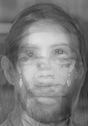

In [187]:
mean_face = compute_mean_vector(image_vectors)
vec_to_img(mean_face)

In [164]:
residual_vectors = np.array([f - mean_face for f in image_vectors]).T
rank = np.linalg.matrix_rank(residual_vectors)
residual_vectors.shape, rank

((11088, 5), 4)

In [165]:
u, s, vh = np.linalg.svd(residual_vectors, full_matrices=True)
face_basis = u
face_basis.shape

(11088, 11088)

In [166]:
face_basis

array([[-1.55945629e-02,  1.30244149e-03,  1.15842874e-02, ...,
        -8.79928172e-03, -4.68264189e-03, -5.20930356e-03],
       [-1.55780109e-02,  9.82844870e-04,  1.08292837e-02, ...,
         7.96636022e-03,  6.58740348e-03,  3.72753515e-03],
       [-1.59447061e-02, -2.62199967e-04,  6.44932288e-03, ...,
        -2.77776535e-03,  1.53020171e-03, -2.44398076e-03],
       ...,
       [ 3.27243603e-03,  1.01666269e-02, -1.25023381e-02, ...,
         9.99535082e-01, -4.50002944e-04, -3.64850054e-04],
       [ 8.75768432e-03,  6.32808519e-03, -1.18082420e-02, ...,
        -4.26859645e-04,  9.99545789e-01, -3.49746061e-04],
       [ 7.91690942e-03,  4.77560548e-03, -1.00814879e-02, ...,
        -3.50485877e-04, -3.80128541e-04,  9.99675430e-01]])

Base faces


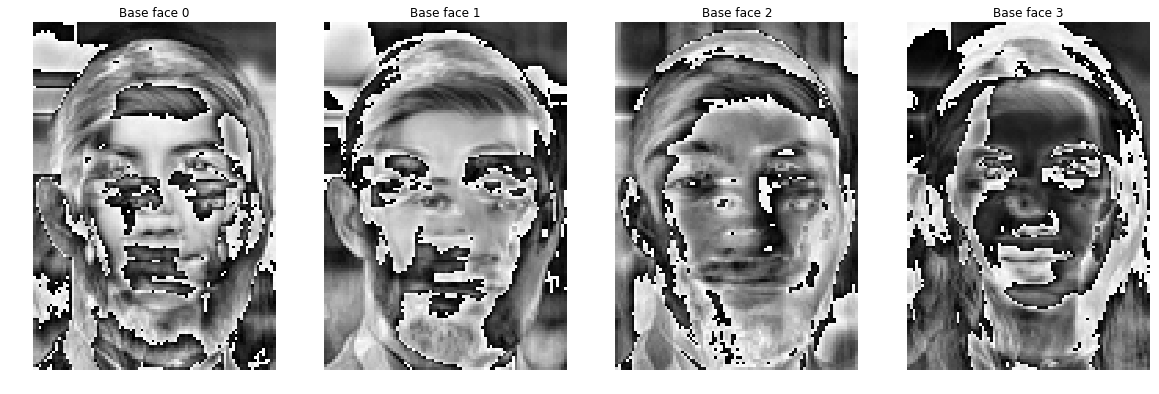

In [167]:
print('Base faces')    
def norm_face_vec(v):
    return v/np.max(v) * 255

fig = plt.figure(figsize=(20, 10))

for i in range(0, rank):
    a = fig.add_subplot(1, rank, i+1)
    a.axis('off')
    a.imshow(vec_to_img(norm_face_vec(face_basis[:, i])))
    a.set_title(f'Base face {i}')

In [222]:
def scalar_projection(vector, mean_vector, basis):
    return basis.T.dot((vector - mean_vector))

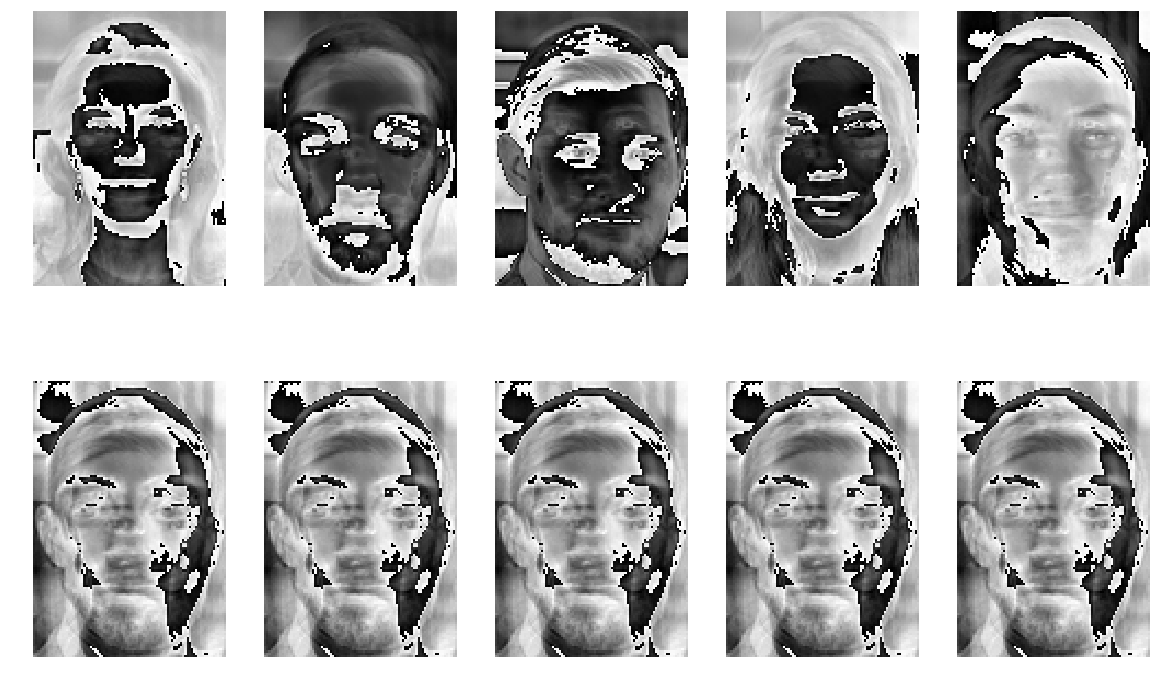

In [223]:
train_projections = np.array([scalar_projection(im, mean_face, face_basis) for im in residual_vectors.T])
fig = plt.figure(figsize=(20, 25))
for i, proj in enumerate(train_projections):
    a = fig.add_subplot(1, len(train_projections), i+1)
    a.axis('off')
    a.imshow(vec_to_img(proj))
    b = fig.add_subplot(2, len(train_projections), i+1)
    b.axis('off')
    b.imshow(vec_to_img(residual_vectors.T[i]))

(126, 88)
5.jpg
(126, 88)
1.jpg
(126, 88)
2.jpg
(126, 88)
3.jpg
(126, 88)
4.jpg


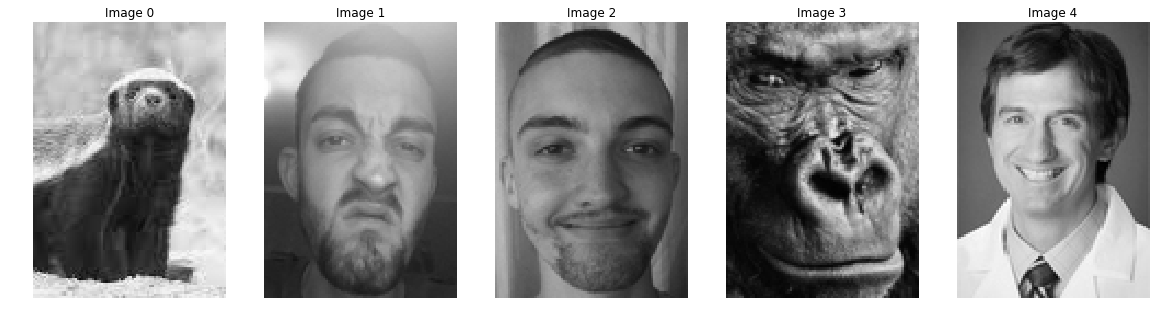

In [226]:
test_faces_path = './data/test'
test_faces = load_images(test_faces_path)
fig = plt.figure(figsize=(20, 10))
for i, im in enumerate(test_faces):
    a = fig.add_subplot(1, len(test_faces), i+1)
    a.axis('off')
    a.imshow(vec_to_img(im))
    a.set_title(f'Image {i}')

In [227]:
def norm_2(v1, v2):
    return np.sqrt((v1-v2).T.dot(v1-v2))

def distance_from_face_space(v1, mean_face, basis):
    fp = basis.dot(v1)
    return norm_2(v1-mean_face, fp)
    
def distance_in_face_space(v1, v2):
    return norm_2(v1, v2)

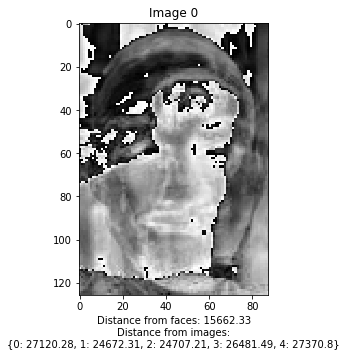

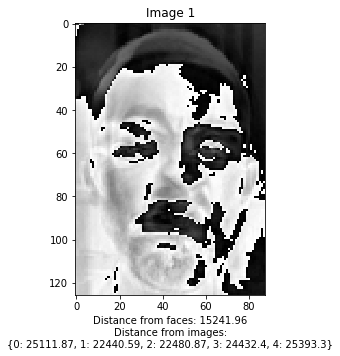

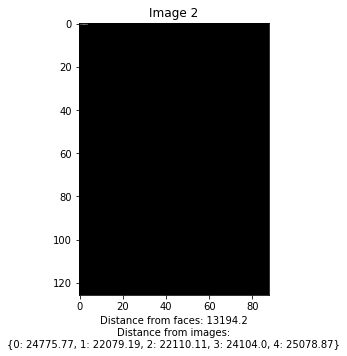

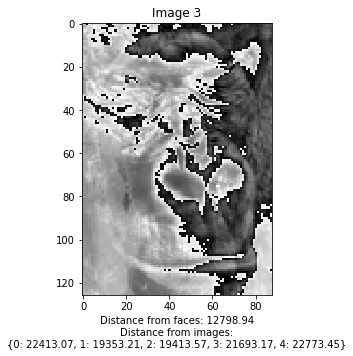

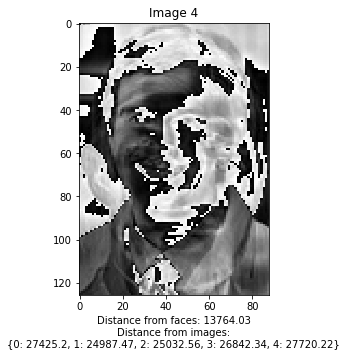

In [235]:
test_projections = np.array([scalar_projection(im, mean_face, face_basis) for im in test_faces])

for i, proj in enumerate(test_projections):
    fig = plt.figure(figsize=(5, 5))
    a = fig.add_subplot(1, 1, 1)
    a.imshow(vec_to_img(proj))
    a.set_title(f'Image {i}')
    
    dist_faces = round(distance_from_face_space(proj, mean_face, face_basis), 2)
    distances_from_train_images = {}
    for j, im in enumerate(train_projections):
        prj = scalar_projection(im, mean_face, face_basis)
        distances_from_train_images[j] = round(distance_in_face_space(proj, prj), 2)
        
    a.set_xlabel('Distance from faces: {}\nDistance from images:\n{}'.format(dist_faces, str(distances_from_train_images)))